# EX2_2
Find different words in newspaper article
We'll do this using morphology operators and connected components.


In [11]:
# to run in google colab
import sys
if 'google.colab' in sys.modules:
    import subprocess
    subprocess.call('apt-get install subversion'.split())
    subprocess.call('svn export https://github.com/YoniChechik/AI_is_Math/trunk/c_02a_basic_image_processing/ex2/news.jpg'.split())



In [12]:
import numpy as np
import matplotlib.pyplot as plt
import cv2

figsize = (10, 10)



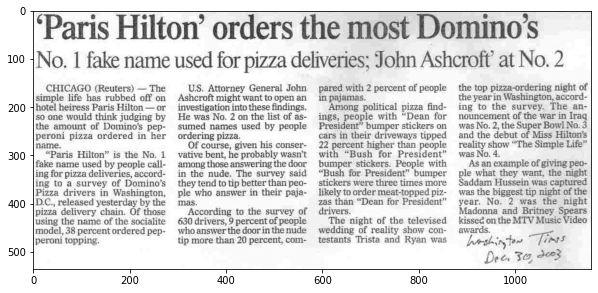

In [13]:
im = cv2.imread("news.jpg")
im_gray = cv2.cvtColor(im,cv2.COLOR_BGR2GRAY)

plt.figure(figsize=figsize)
plt.imshow(im_gray,cmap="gray",vmin=0,vmax=255)
plt.show()



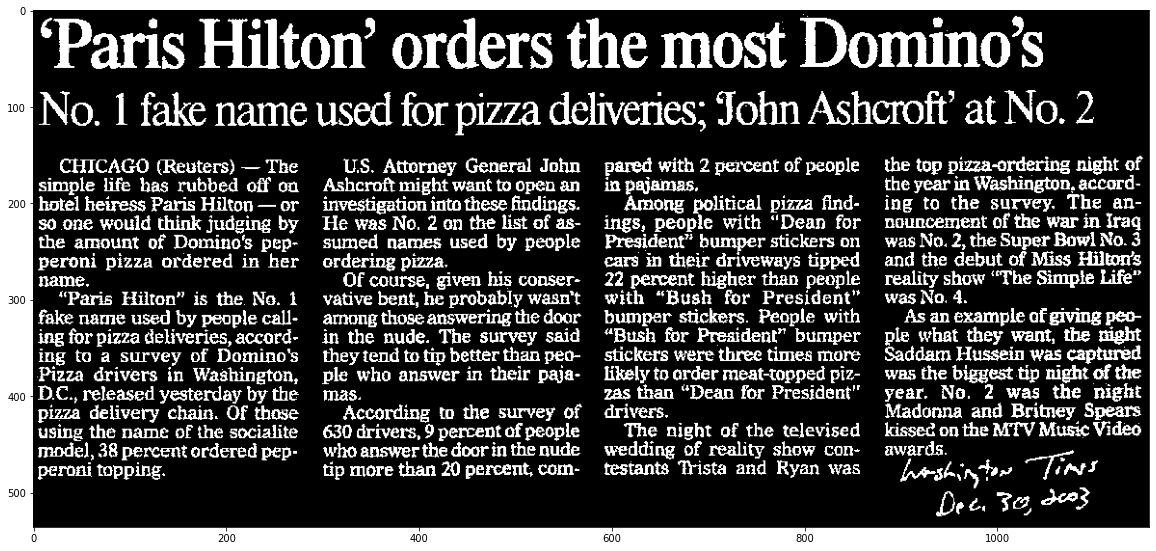

In [14]:
# TODO: let's start with turning the image to a binary one

_,im_th =  cv2.threshold(im_gray, 180 ,1, cv2.THRESH_BINARY_INV)  # sets the text to True (1) and the background to False (0)  
plt.figure(figsize=(20,20))
plt.imshow(im_th, cmap="gray")
plt.show()



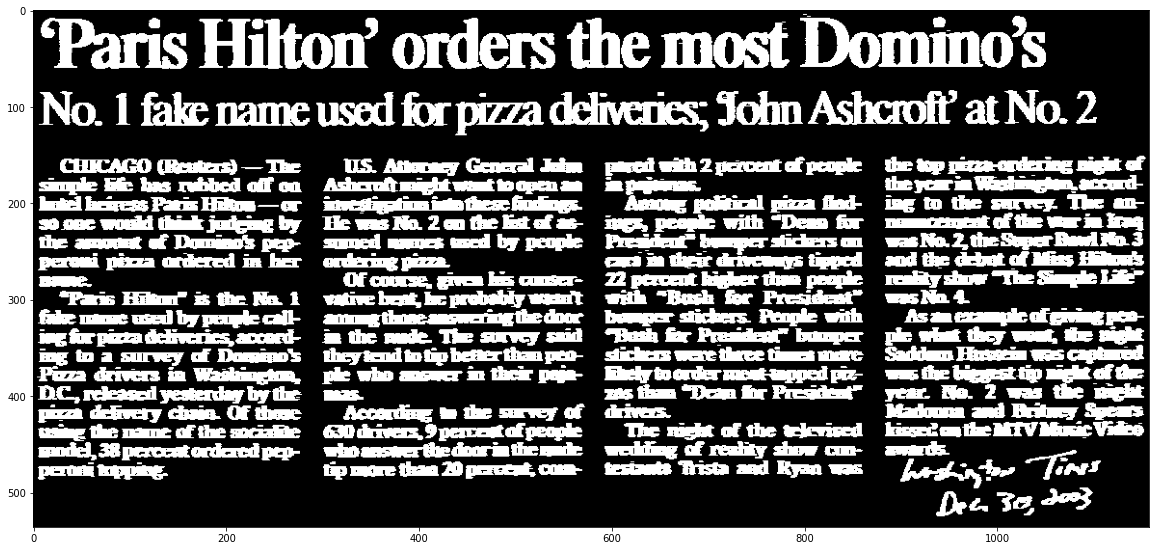

In [25]:
# TODO: next, merge all pixels of the same word together to make one connected component using a morphologic operator
kernel = np.ones(shape=(1,2))
dilated_im = cv2.dilate(im_th, kernel=kernel, iterations=3)  


plt.figure(figsize=(20,20))
plt.imshow(dilated_im, cmap="gray")
plt.show()



In [22]:
# TODO: draw rectengles around each word:
# 1. find all connected components
# 2. build a mask of only one connected component each time, and find it extremeties
# TODO: did it came out perfect? Why? Why not?
def find_words(dilated_im,im):
  res = im.copy()

  # Perform the operation

  ret , labels = cv2.connectedComponents(dilated_im)
  print("connected component " + str(ret))
  for label in range(1, ret):  
    mask = labels.copy()
    mask[labels == label] = 1
    mask[labels != label] = 0 
    res = plot_rec(mask,res)   
  
    #text = "examining component {}/{}".format(label+1, ret)
    #print(text)


  return res






In [17]:
def plot_rec(mask,res_im):
    # plot a rectengle around each word in res image using mask image of the word
    xy = np.nonzero(mask)
    y = xy[0]
    x = xy[1]
    left = x.min()
    right = x.max()
    up = y.min()
    down = y.max()

    res_im = cv2.rectangle(res_im, (left, up), (right, down), (0, 20, 200), 2)
    return res_im


connected component 492


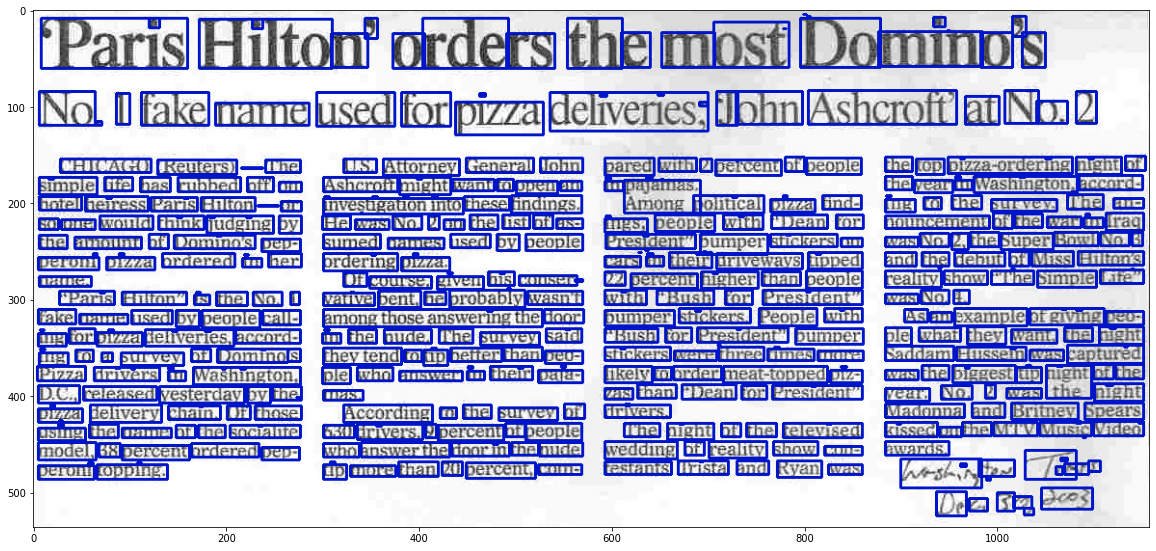

In [26]:
plt.figure(figsize=(20,20))
plt.imshow(find_words(dilated_im,im))
plt.show()




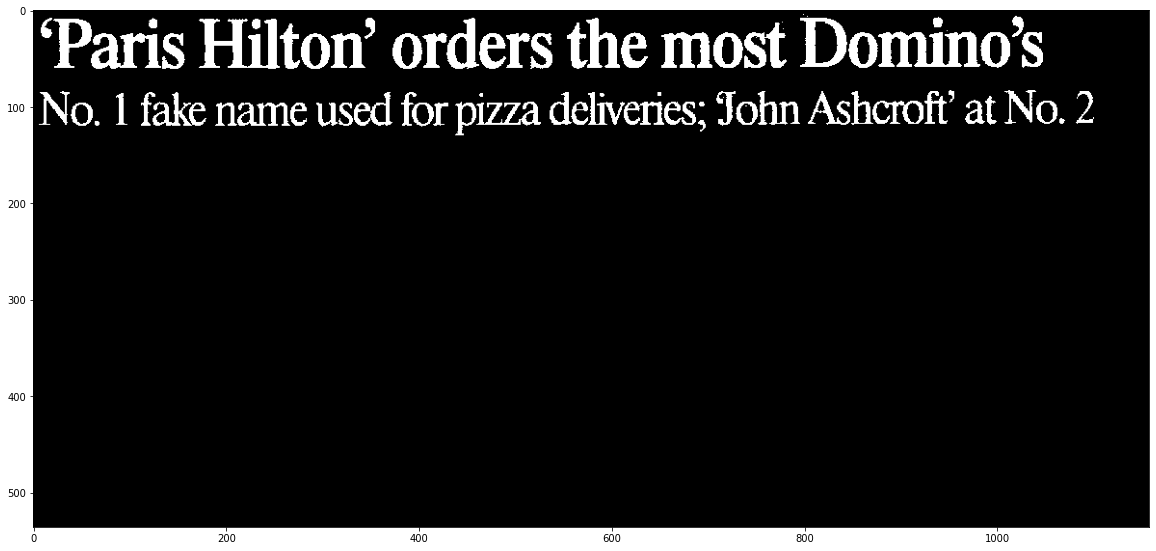

In [32]:
# Erode paragraphs 
_,im_eroded_paragraphs =  cv2.threshold(im_gray, 180 ,1, cv2.THRESH_BINARY_INV)      # sets the text to True (1) and the background to False (0)  
kernel = np.ones(shape=(3,3))
im_eroded_paragraphs[150:, :] = cv2.erode(im_eroded_paragraphs[150:,:],kernel, iterations=3)
plt.figure(figsize=(20,20))
plt.imshow(im_eroded_paragraphs, cmap="gray")
plt.show()



connected component 20


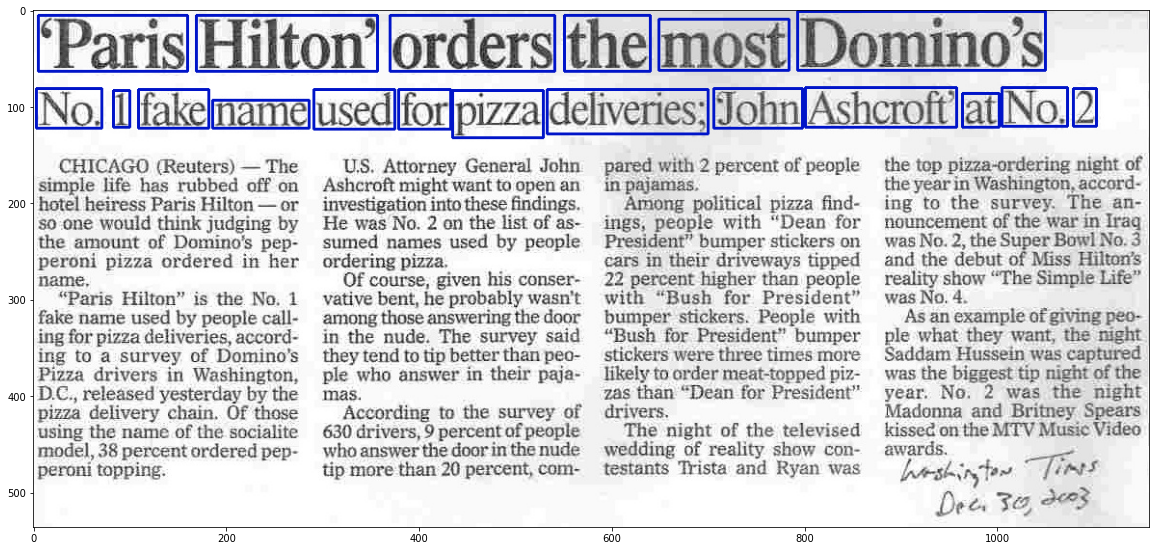

In [33]:
# TODO: now we want to mark only the big title words, and do this ONLY using morphological operators
binary_only_title_cc_img = im_eroded_paragraphs.copy()
kernel = np.ones(shape=(3,3))
binary_only_title_cc_img = cv2.dilate(binary_only_title_cc_img, kernel=kernel, iterations=3)  

plt.figure(figsize=(20,20))
plt.imshow(find_words(binary_only_title_cc_img,im))
plt.show()
